##**Importing Libraries**

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import pandas as pd

import seaborn as sns

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC


from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

## **Data Pre-Processing**

In [ ]:
df=pd.read_csv('/content/insulin_prediction.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target_glucose,Insulin_prescribed,avg_heart_beat,gender,covid_positive,Previous_generation_diabetes,sleep,Workout,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,93,1.10,83,0,0,1,4,2267,1
1,1,85,66.0,29,0,26.6,0.351,31,0,0.00,81,0,1,1,6,1540,0
2,8,183,64.0,0,0,23.3,0.672,32,118,1.30,86,0,1,0,6,1709,1
3,1,89,66.0,23,94,28.1,0.167,21,0,0.00,81,0,0,0,6,2046,0
4,0,137,40.0,35,168,43.1,2.288,33,95,0.84,69,1,0,0,5,1345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0,0.00,85,0,1,1,6,1319,0
764,2,122,70.0,27,0,36.8,0.340,27,0,0.00,82,0,0,1,7,735,0
765,5,121,72.0,23,112,26.2,0.245,30,0,0.00,82,0,1,1,9,2296,0
766,1,126,60.0,0,0,30.1,0.349,47,0,0.00,89,0,1,1,7,2070,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pregnancies                   768 non-null    int64  
 1   Glucose                       768 non-null    int64  
 2   BloodPressure                 768 non-null    float64
 3   SkinThickness                 768 non-null    int64  
 4   Insulin                       768 non-null    int64  
 5   BMI                           768 non-null    float64
 6   DiabetesPedigreeFunction      768 non-null    float64
 7   Age                           768 non-null    int64  
 8   target_glucose                768 non-null    int64  
 9   Insulin_prescribed            768 non-null    float64
 10  avg_heart_beat                768 non-null    int64  
 11  gender                        768 non-null    int64  
 12  covid_positive                768 non-null    int64  
 13  Previ

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target_glucose,Insulin_prescribed,avg_heart_beat,gender,covid_positive,Previous_generation_diabetes,sleep,Workout,Outcome
0,6,148,72.000000,35,0,33.6,0.627,50,93,1.10,83,0,0,1,4,2267,1
1,1,85,66.000000,29,0,26.6,0.351,31,0,0.00,81,0,1,1,6,1540,0
2,8,183,64.000000,0,0,23.3,0.672,32,118,1.30,86,0,1,0,6,1709,1
3,1,89,66.000000,23,94,28.1,0.167,21,0,0.00,81,0,0,0,6,2046,0
4,0,137,40.000000,35,168,43.1,2.288,33,95,0.84,69,1,0,0,5,1345,1
5,5,116,74.000000,0,0,25.6,0.201,30,0,0.00,90,0,1,0,6,1959,0
6,3,78,50.000000,32,88,31.0,0.248,26,0,0.00,70,0,1,1,6,1079,1
7,10,115,69.105469,0,0,35.3,0.134,29,0,0.00,90,0,1,0,9,569,0
8,2,197,70.000000,45,543,30.5,0.158,53,111,1.72,83,0,0,0,6,2287,1
9,8,125,96.000000,0,0,0.0,0.232,54,0,0.00,88,0,0,0,6,829,1


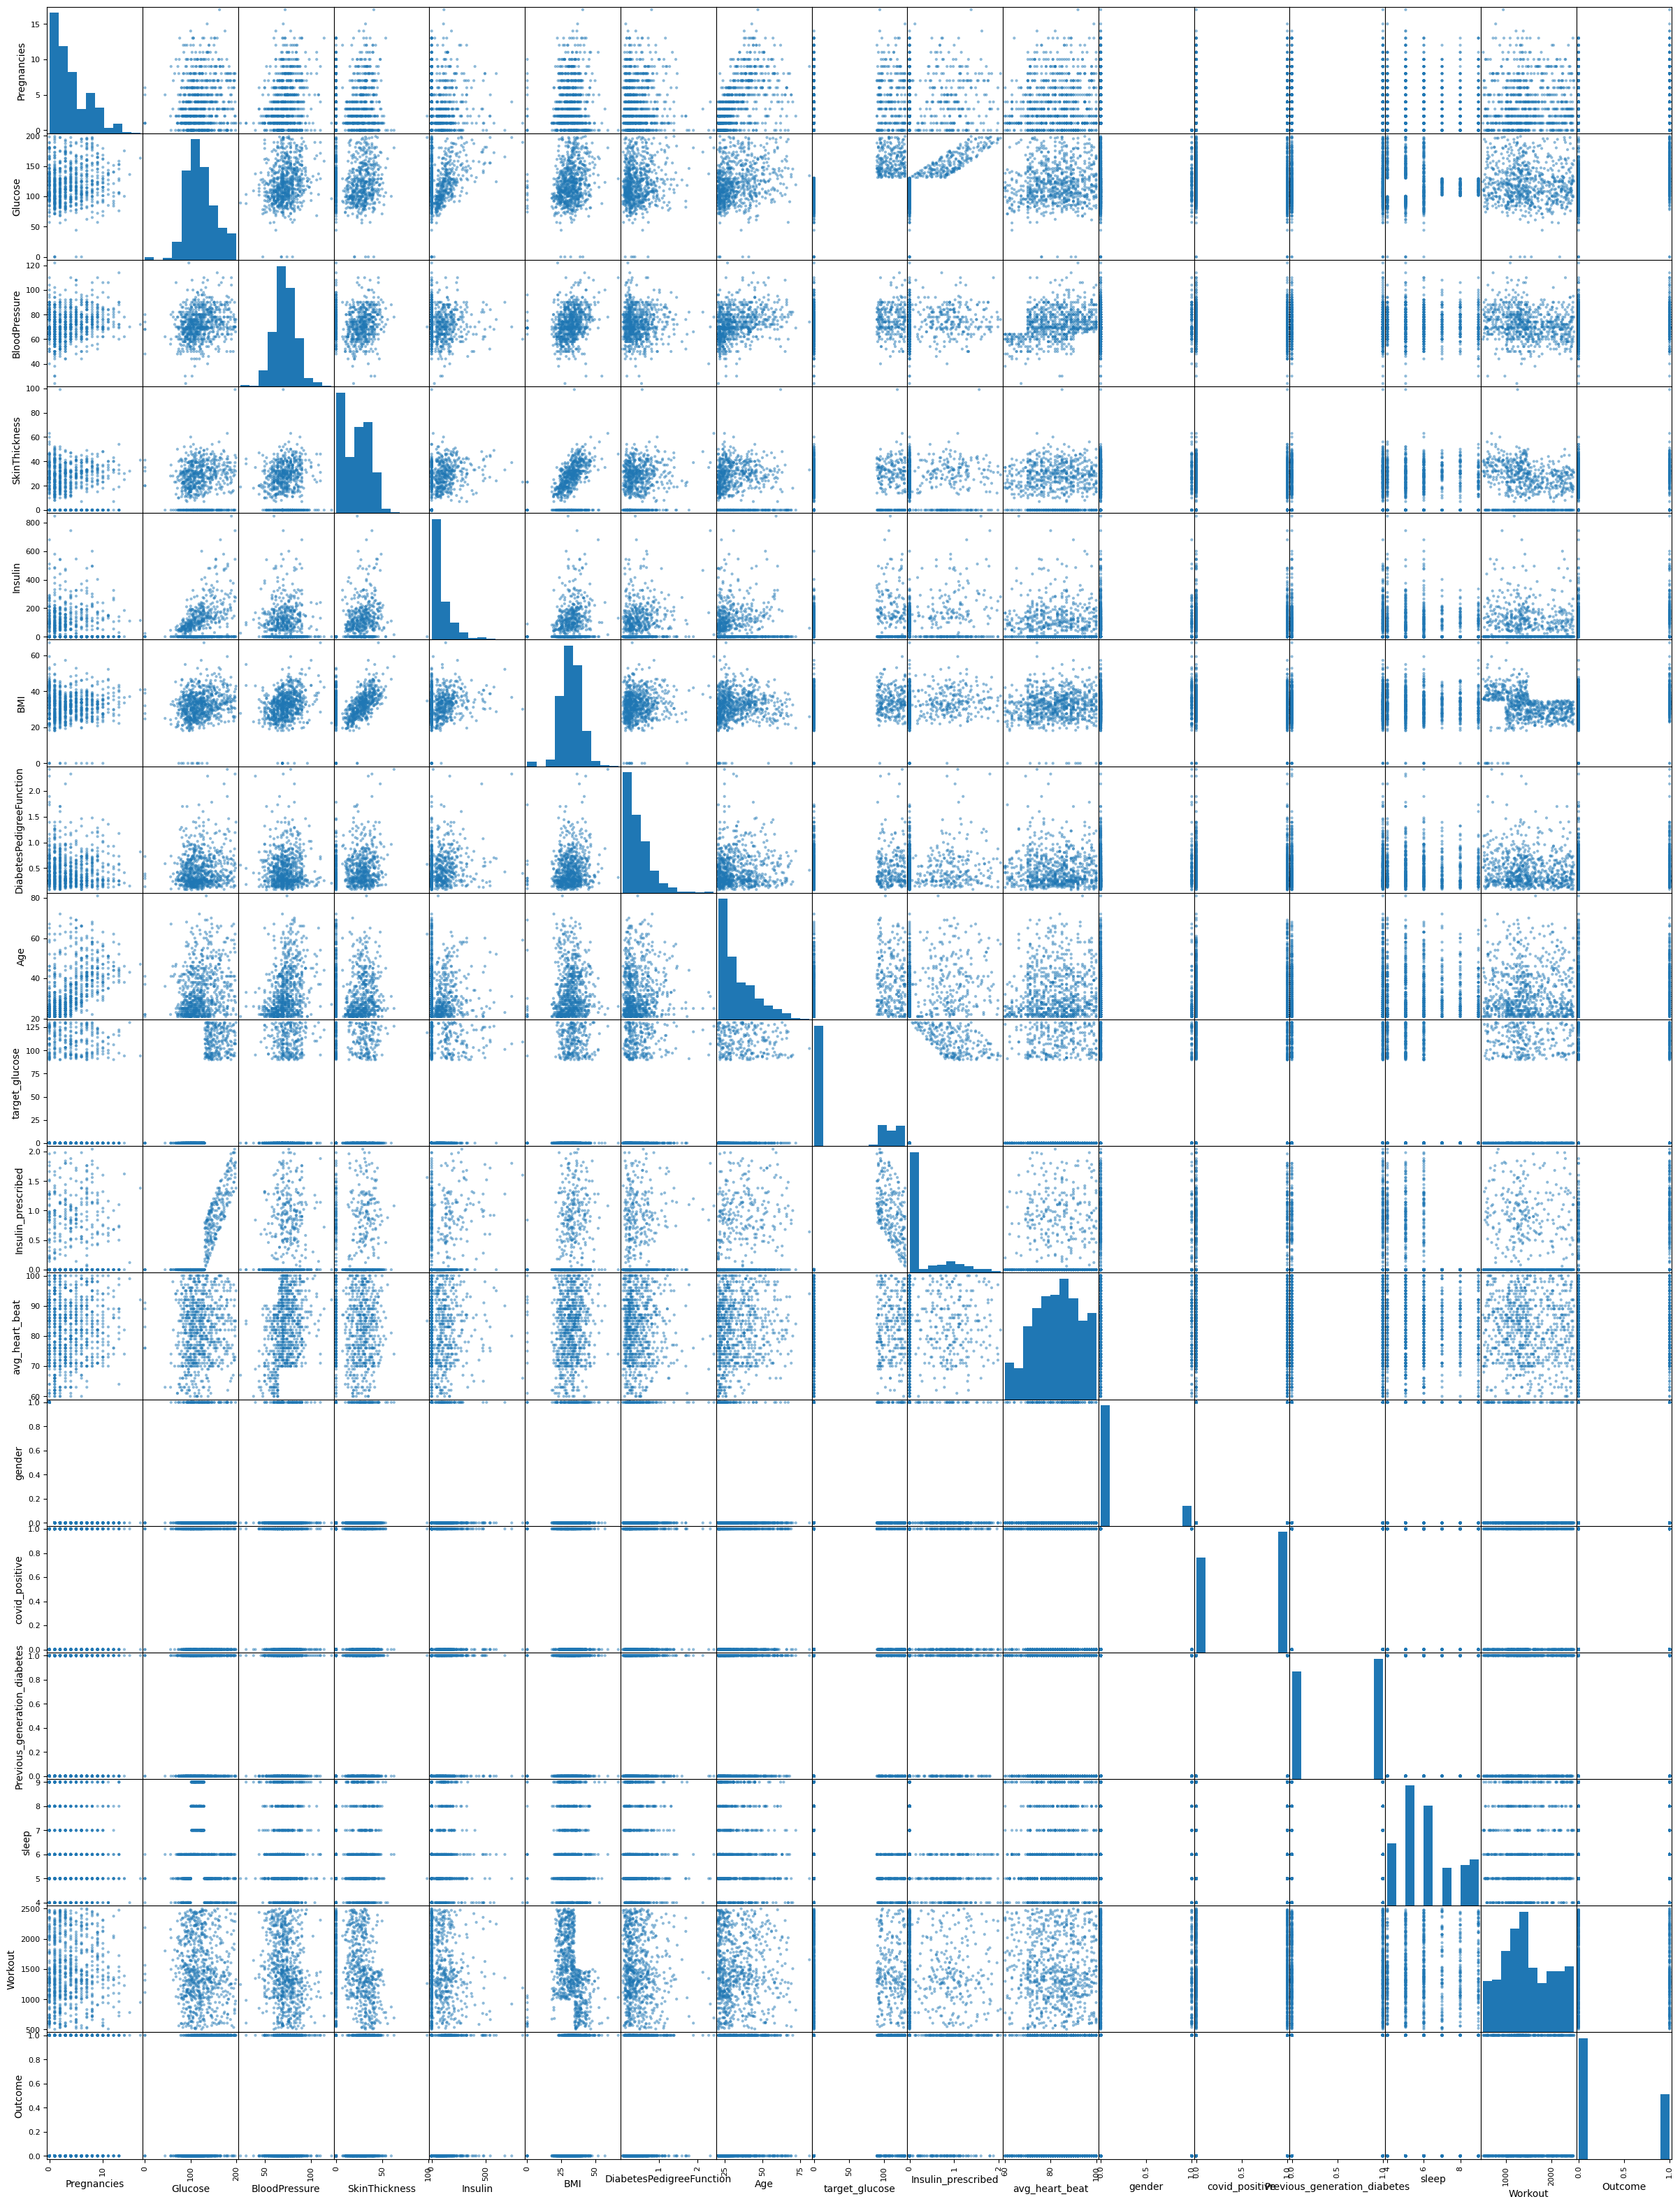

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (30, 40));

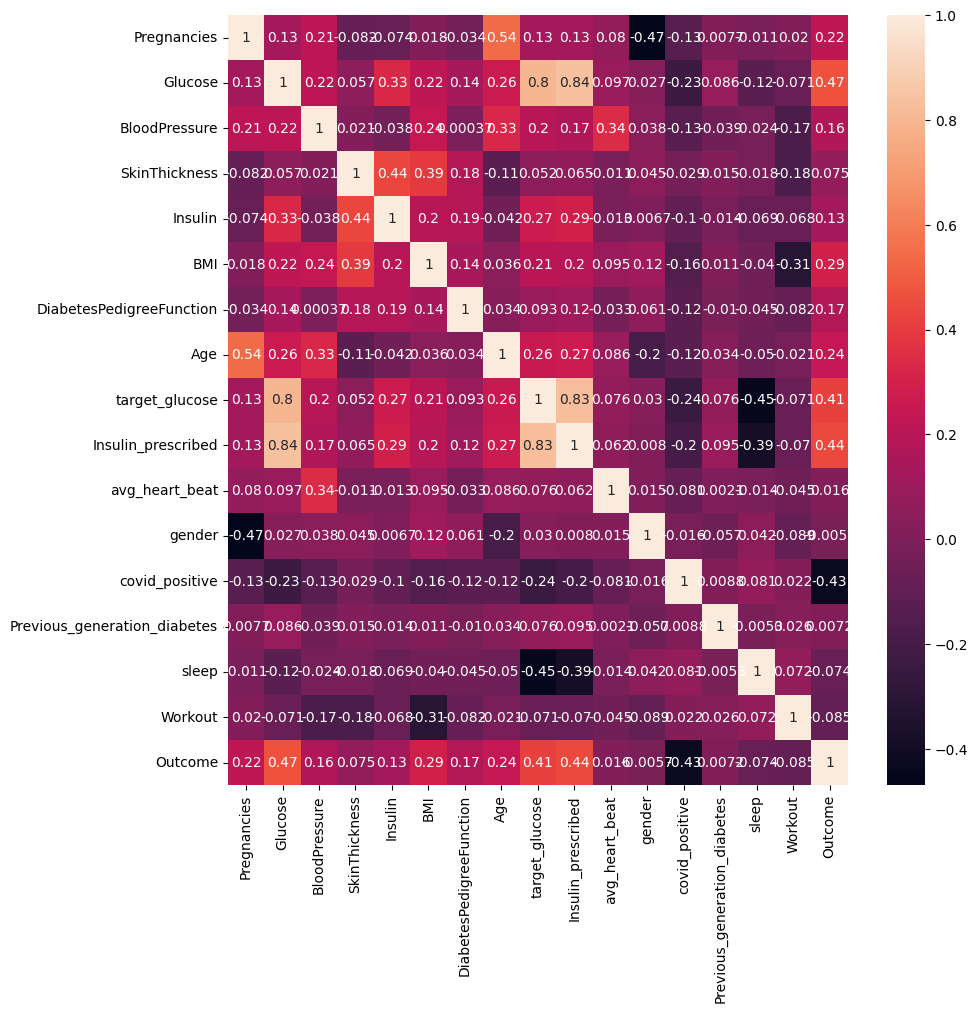

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True,ax=ax)
plt.show()

In [ ]:
def ordinal_encoding(df,column,ordering):
  df=df.copy()
  df[column]=df[column].apply(lambda x: ordering.index(x))
  return df

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, :-1].values

In [ ]:
def preprocessing(df,task):
  df=df.copy()
  if task=='Regression':
    Y=df['Outcome']
  elif task=='Classification':
    Y=df['Outcome'].apply(lambda x: 1 if x>0 else 0)

  X=df.drop('Outcome',axis=1)

  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.80,shuffle=True,random_state=1)

  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

In [ ]:
X_train,X_test,Y_train,Y_test=preprocessing(df,task='Classification')

In [ ]:
Y_train

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 614, dtype: int64

# **ML Models**

## **Machine Learning Models**

In [ ]:
p=[]
q=[]
r=[]
x=[]
y=[]

### **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(154,)

In [ ]:
f1_score_lr = round(f1_score(Y_pred_lr,Y_test)*100,2)
print(f1_score_lr)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
p.append(score_lr)
r.append(f1_score_lr)
q.append("Logistic Regression")

72.57
The accuracy score achieved using Logistic Regression is: 79.87 %


In [ ]:
p

[79.87]

### **Naive Bayes**

In [ ]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(154,)

In [ ]:
f1_score_nb = round(f1_score(Y_pred_nb,Y_test)*100,2)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
p.append(score_nb)
r.append(f1_score_nb)
q.append("Naive Bayes")

The accuracy score achieved using Naive Bayes is: 74.03 %


### **SVM**

In [ ]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(154,)

In [ ]:
f1_score_svm = round(f1_score(Y_pred_svm,Y_test)*100,2)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
p.append(score_svm)
r.append(f1_score_svm)
q.append("SVM")

The accuracy score achieved using Linear SVM is: 78.57 %


### **K Nearest Neighbour**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(154,)

In [ ]:
f1_score_knn = round(f1_score(Y_pred_knn,Y_test)*100,2)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
p.append(score_knn)
r.append(f1_score_knn)
q.append("KNN")

The accuracy score achieved using KNN is: 76.62 %


### **Decision Tree**

In [ ]:
max_accuracy = 0

for a in range(200):
    dt = DecisionTreeClassifier(random_state=a)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = a

#print(max_accuracy)
print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

65


In [ ]:
print(Y_pred_dt.shape)

(154,)


In [ ]:
f1_score_dt = round(f1_score(Y_pred_dt,Y_test)*100,2)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
p.append(score_dt)
r.append(f1_score_dt)
q.append("Decision Tree")

The accuracy score achieved using Decision Tree is: 78.57 %


### **XGBoost**

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(154,)

In [ ]:
f1_score_xgb = round(f1_score(Y_pred_xgb,Y_test)*100,2)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
p.append(score_xgb)
r.append(f1_score_xgb)
q.append("XGBoost")

The accuracy score achieved using XGBoost is: 79.87 %


### **Random Forest**

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
Y_pred_rf.shape

(154,)

In [ ]:
f1_score_rf = round(f1_score(Y_pred_rf,Y_test)*100,2)
score_rf = round(accuracy_score(Y_test, Y_pred_rf)*100,2)
print('Accuracy of Random Forest Model :', score_rf)
p.append(score_rf)
r.append(f1_score_rf)
q.append("Random Forest")

Accuracy of Random Forest Model : 82.47


### **lightGBM**

In [ ]:
import lightgbm as lgb

gbm_model = lgb.LGBMClassifier(
    objective='binary',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=20,
    early_stopping_rounds=5
)

gbm_model.fit(
    X_train,
    Y_train,
    eval_set=[(X_test, Y_test)],
    eval_metric='accuracy'
)


[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 16
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

LGBMClassifier(early_stopping_rounds=5, learning_rate=0.05, n_estimators=20,
               objective='binary')

In [ ]:
Y_pred_lgb = gbm_model.predict(X_test, num_iteration=gbm_model.best_iteration_)

In [ ]:
Y_pred_lgb.shape

(154,)

In [ ]:
p = []  # List to store accuracy scores
r = []  # List to store F1 scores
q = []  # List to store model names
f1_score_lgb = round(f1_score(Y_pred_lgb, Y_test) * 100, 2)
score_lgb = round(accuracy_score(Y_test, Y_pred_lgb) * 100, 2)
print("Accuracy of LightGBM model is:", score_lgb)
p.append(score_lgb)
r.append(f1_score_lgb)
q.append("LightGBM")

Accuracy of LightGBM model is: 83.77


### **AdaBoost** and **GradientBoost**

In [ ]:
#AdaBoost
clf1 = AdaBoostClassifier(n_estimators=100)
clf1.fit(X_train, Y_train)
Y_pred_adaboost = clf1.predict(X_test)

#GradientBoost
clf2 = GradientBoostingClassifier(n_estimators=100)
clf2.fit(X_train, Y_train)
Y_pred_gradientboost = clf2.predict(X_test)


#Calculate accuracy of insulin predictions using both Adaboost and Gradientboost
score_adb = round(accuracy_score(Y_test, Y_pred_adaboost)*100,2)
score_gdb = round(accuracy_score(Y_test, Y_pred_gradientboost)*100,2)

print("Accuracy of Adaboost model: ",score_adb)
print("Accuracy of GradientBoost model: ",score_gdb)

Accuracy of Adaboost model:  79.22
Accuracy of GradientBoost model:  82.47


## **Ensembel model**

In [ ]:
m=[]
n=[]
s=[]

### **model 1**    Random Forest and XGBoost

In [ ]:
#training using random forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#training using XGBoost
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#predicting using random forest
Y_pred_rf = rf_clf.predict(X_test)

#predicting using XGBoost
Y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
#combining predictions using ensembel
Y_pred_ensemble = (Y_pred_rf + Y_pred_xgb)//2
#print(Y_pred_ensemble)
#print(Y_test)

In [ ]:
f1_score_rfxg = round(f1_score(Y_pred_ensemble,Y_test)*100,2)
accuracy = round(accuracy_score(Y_test, Y_pred_ensemble)*100,2)
print("Accuracy of the model is:", accuracy)
m.append(accuracy)
s.append(f1_score_rfxg)
n.append("RF & XG")

Accuracy of the model is: 81.82


### **model 2**  SVM and Random Forest

In [ ]:
sv = svm.SVC(kernel='linear', probability=True) #predict_proba is not available when  probability=False
rf_c =  RandomForestClassifier(n_estimators=50)

In [ ]:
ensemble_model = VotingClassifier(estimators=[('svc', sv), ('rf', rf_c)], voting='soft')

In [ ]:
# Fitting the model
ensemble_model.fit(X_train, Y_train)

# Calculating the accuracy
accuracy = round(ensemble_model.score(X_test, Y_test)*100,2)

In [ ]:
print('The accuracy of the ensemble model is: ', accuracy)
m.append(accuracy)
s.append(0)
n.append("RF & SVM")

The accuracy of the ensemble model is:  81.17


### **model 3** Random Forest and knn

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, Y_train)
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)


KNeighborsRegressor()

In [ ]:
knn_preds = knn.predict(X_test)
rf_preds = rf.predict(X_test)
combined_preds=knn_preds+rf_preds
#Combine predictions using ensembling
#ensemble_preds = np.array([knn_preds, rf_preds]).mean(axis=0)
#print(ensemble_preds)

In [ ]:
#Calculate accuracy of the ensemble model

mse=mean_squared_error(Y_test,combined_preds)
rmse=np.sqrt(mse)
accuracy=round((1-rmse)*100,2)
print("The combined accuracy of Knn and RF is: ",accuracy)
m.append(accuracy)
s.append(0)
n.append("RF & KNN")

The combined accuracy of Knn and RF is:  34.22


### **model 4** RF and Decision tree

In [ ]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

In [ ]:
ensemble_model = VotingRegressor(estimators=[('rf',rf_model),('xgb',dt_model)])

In [ ]:
ensemble_model.fit(X_train,Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xgb', DecisionTreeRegressor())])

In [ ]:
ensemble_predictions = ensemble_model.predict(X_test)

In [ ]:
accuracy = round(ensemble_model.score(X_test, Y_test)*100,2)

In [ ]:

print("The accuracy of the ensemble model is: ",accuracy)
m.append(accuracy)
s.append(0)
n.append("RF & DT")

The accuracy of the ensemble model is:  29.88


### **model 5** RF and lightGBM

In [ ]:
#import required libraries
from lightgbm import LGBMClassifier

In [ ]:
#initialize the two models
lgbmclf = LGBMClassifier()

#combine both models with boosting
from sklearn.ensemble import AdaBoostClassifier
boostingclf = AdaBoostClassifier(base_estimator=lgbmclf)

#fit the combined model
boostingclf.fit(X_train, Y_train)

#predict on the test set
Y_pred = boostingclf.predict(X_test)

#compute the accuracy score
from sklearn.metrics import accuracy_score
acc = round(accuracy_score(Y_test, Y_pred)*100,2)
print("Accuracy of combined model of lightGBM model and Random Forest is:",acc)
f1_score_rfgb = round(f1_score(Y_pred,Y_test)*100,2)
s.append(f1_score_rfgb)
m.append(acc)
n.append("RF & LGBM")

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Improved Accuracy

In [ ]:
#import required libraries
from sklearn.tree import DecisionTreeClassifier

#initialize the the models
weak_model = DecisionTreeClassifier(max_depth=11)

#combine the models with boosting
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(base_estimator=weak_model,random_state=65)

#fit the combined model
ada_boost.fit(X_train, Y_train)

#predict on the test set
Y_pred = ada_boost.predict(X_test)

#compute the accuracy score
from sklearn.metrics import accuracy_score
acc = round(accuracy_score(Y_test, Y_pred)*100,2)
print("Accuracy of combined model of Decision Tree and AdaBoost is:",acc)
f1_score_IA = round(f1_score(Y_pred,Y_test)*100,2)

m.append(acc)
s.append(f1_score_IA)
n.append("Dec_Tree")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of combined model of Decision Tree and AdaBoost is: 75.32


## **Graph Plotting**

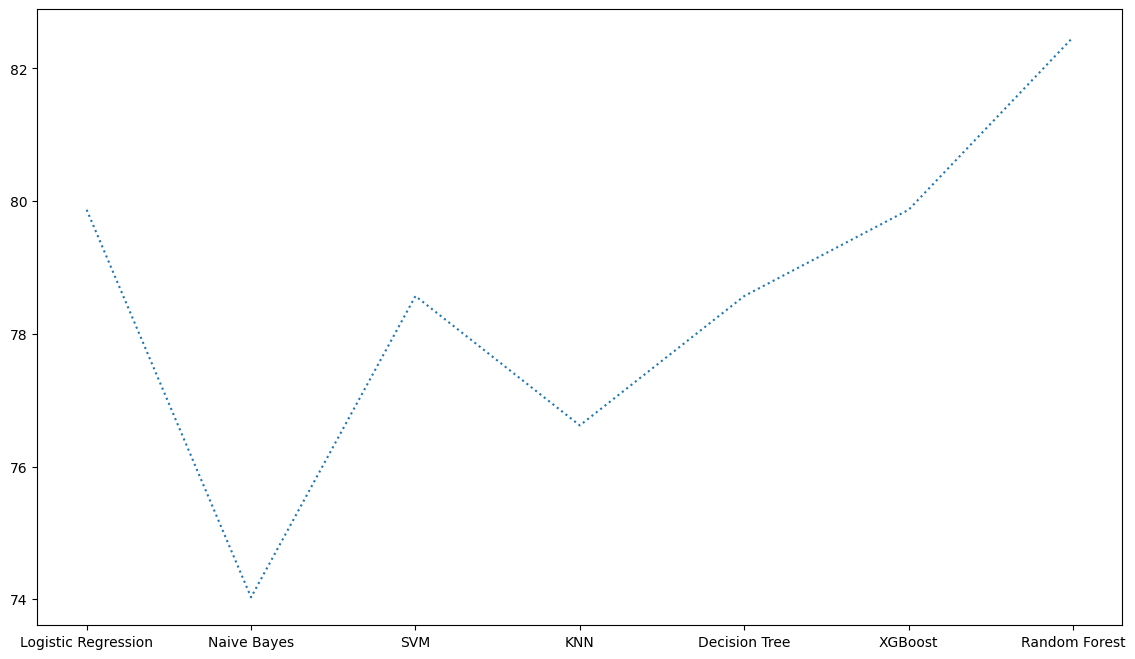

In [ ]:
p=np.array(p)
plot_1 = plt.figure(figsize=(14, 8))
plt.plot(q,p,linestyle='dotted')
plt.show()

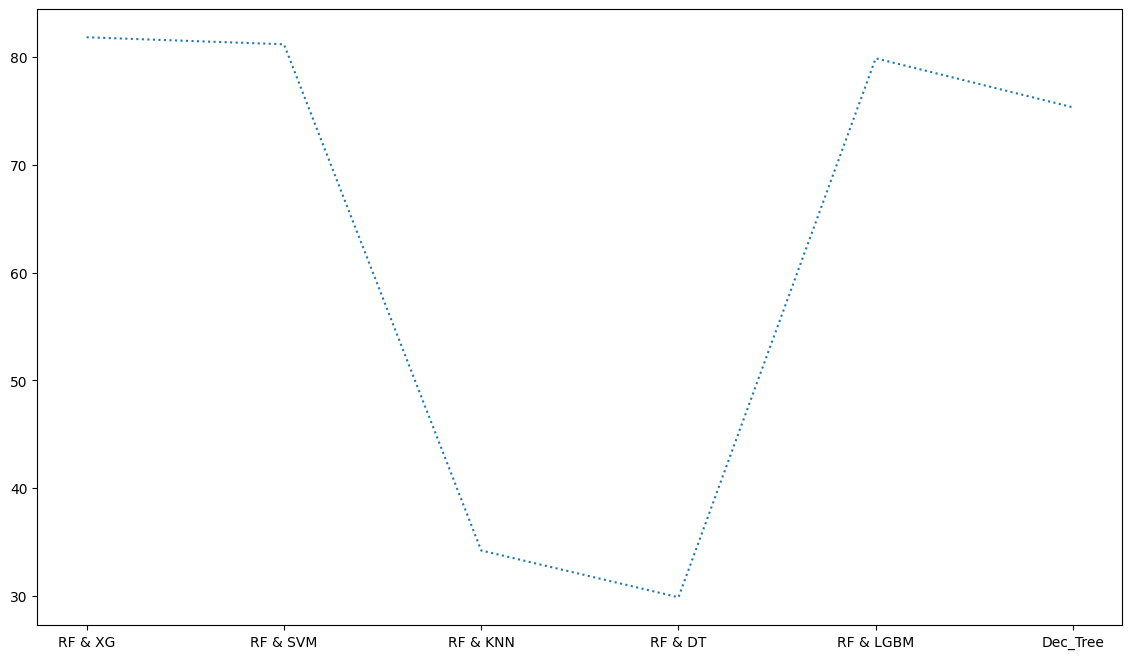

In [ ]:
plot_1 = plt.figure(figsize=(14, 8))
plt.plot(n,m,linestyle='dotted')
plt.show()

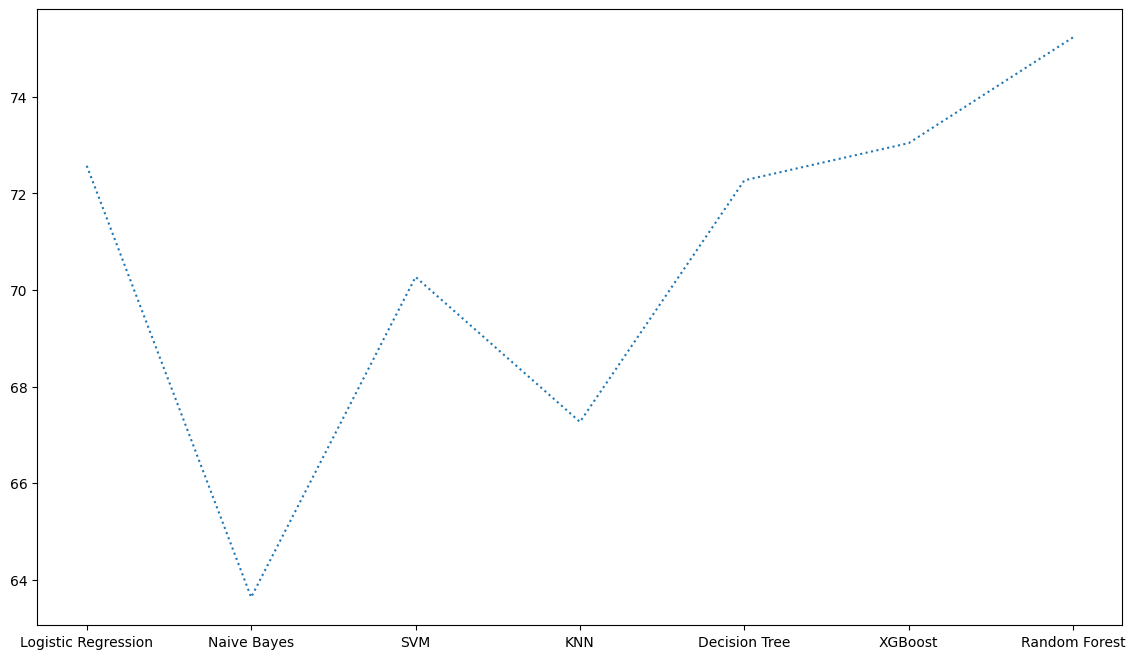

In [ ]:
plot_1 = plt.figure(figsize=(14, 8))
plt.plot(q,r,linestyle='dotted')
plt.show()

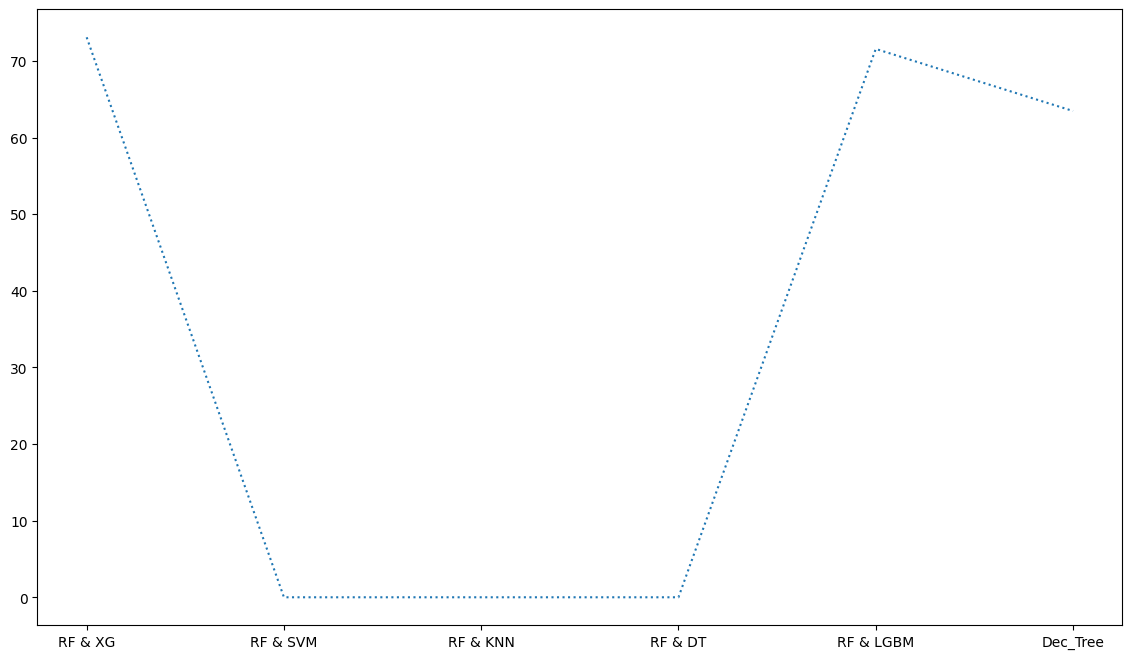

In [ ]:
plot_1 = plt.figure(figsize=(14, 8))
plt.plot(n,s,linestyle='dotted')
plt.show()